In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.getcwd()

'/Users/bkannadasan/Documents/GitHub/DataScience/MachineLearning/Logistic_Regression/walkathon3'

In [9]:
#Load Data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [11]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [13]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [14]:
sample.Loan_Status.value_counts()

Loan_Status
N    367
Name: count, dtype: int64

### Raw sample Dataset submission and its score

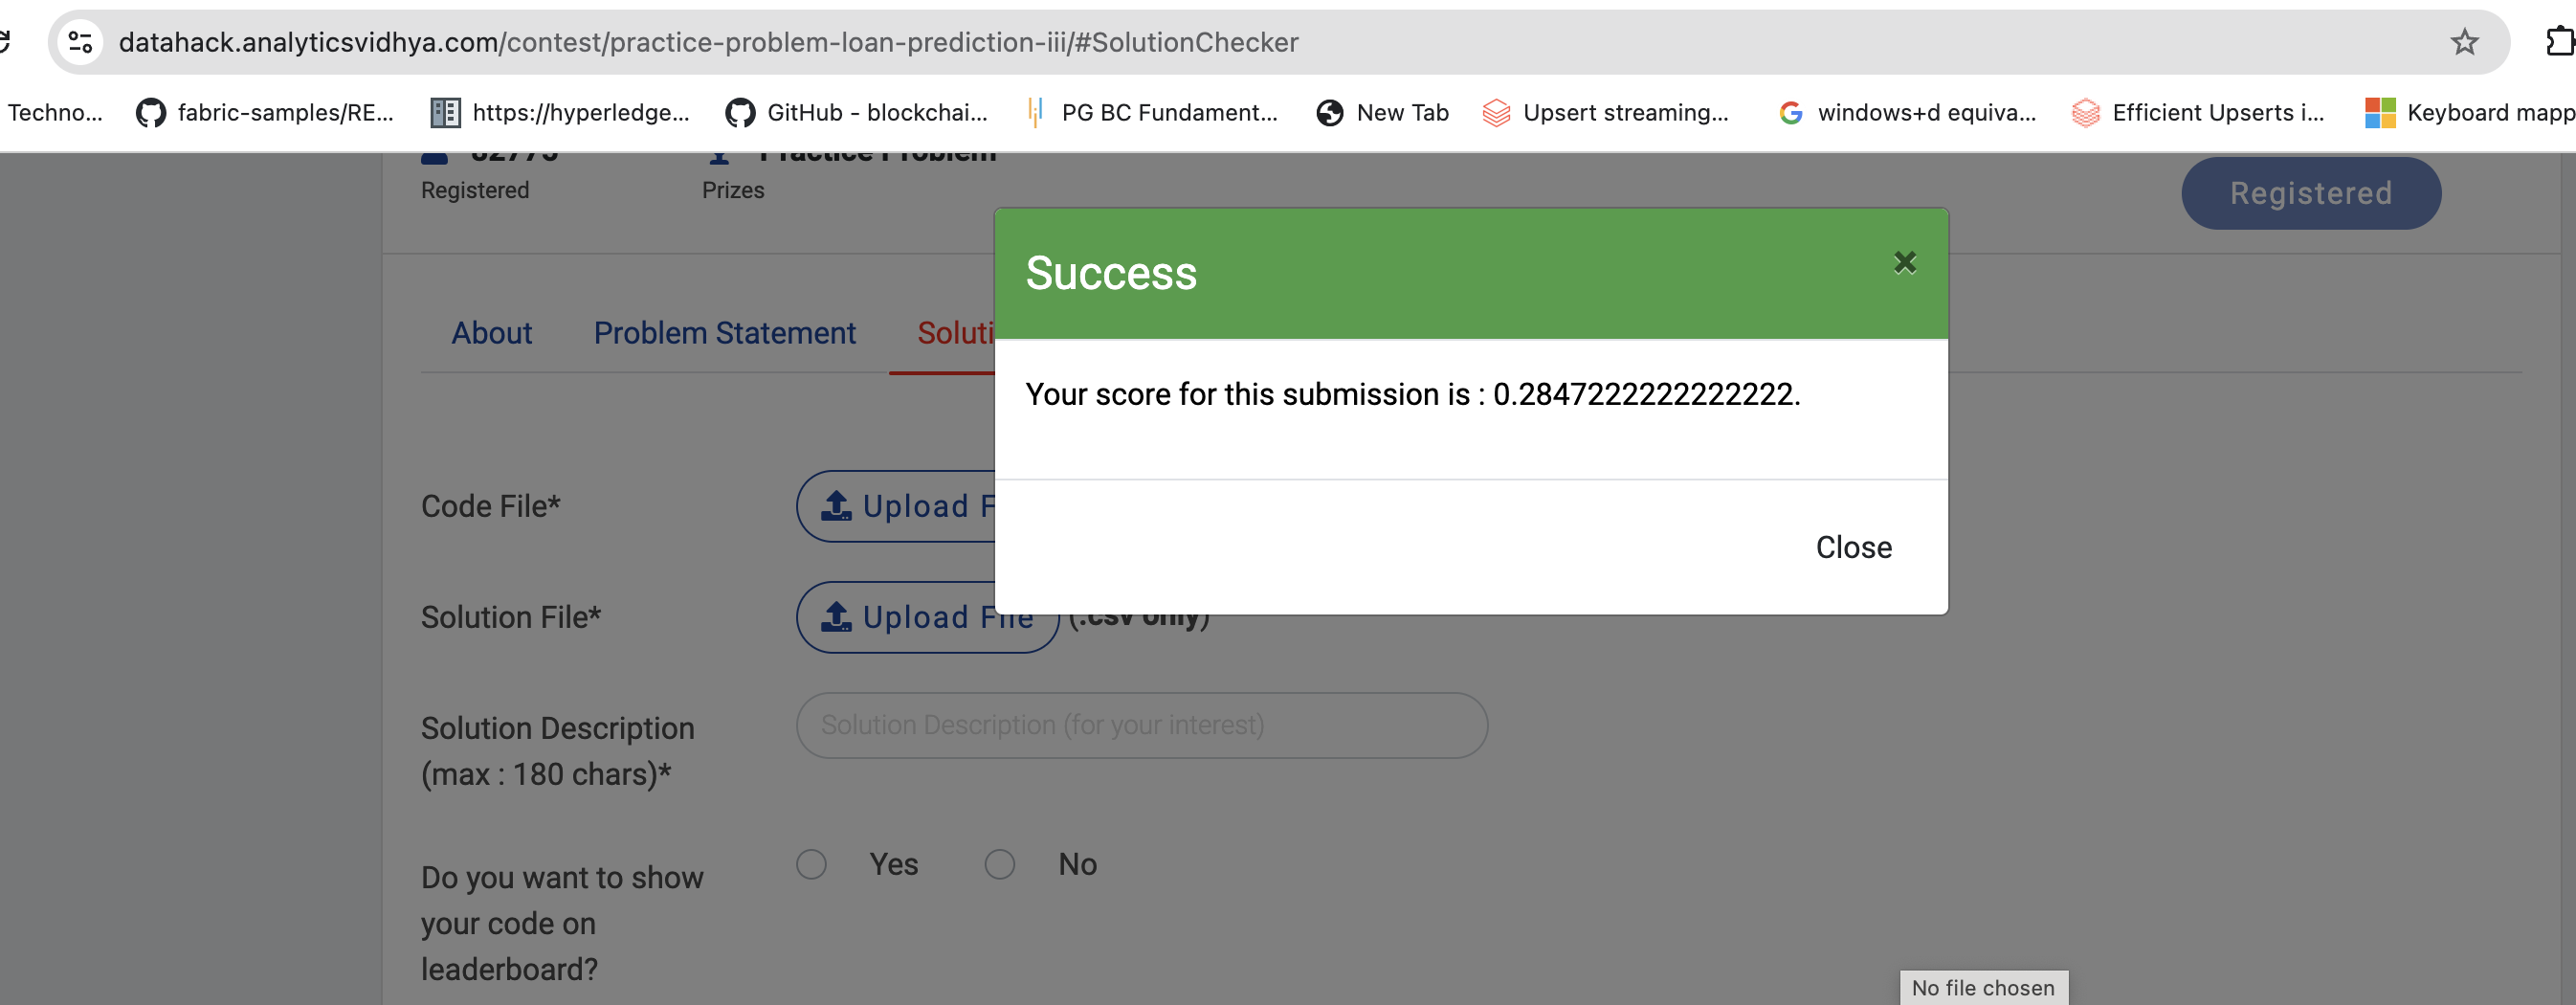

In [77]:
!pip list|grep matplotlib

matplotlib                3.9.2
matplotlib-inline         0.1.7


<Axes: xlabel='Loan_Status', ylabel='count'>

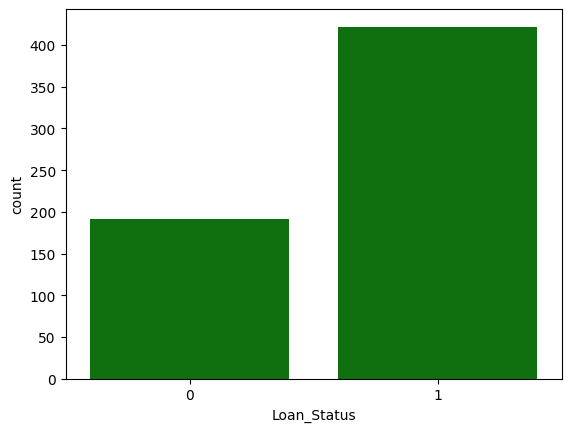

In [80]:
# Exploratory Data Analysis

sns.countplot(x='Loan_Status',data=train,color='green')

[Text(0, 0, '422'), Text(0, 0, '192')]

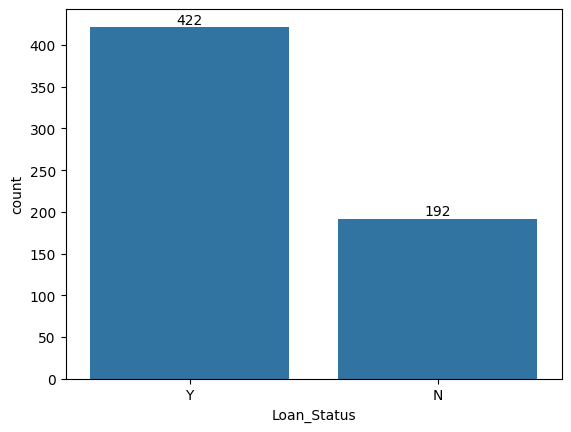

In [19]:
ax = sns.countplot(x='Loan_Status', data=train)
ax.bar_label(ax.containers[0])

In [17]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

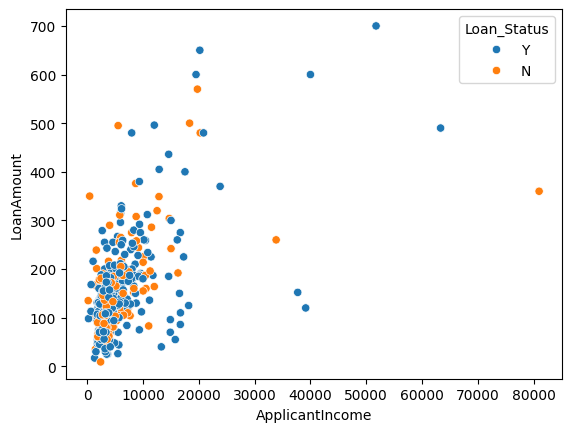

In [18]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',data=train)

<Axes: xlabel='ApplicantIncome', ylabel='Credit_History'>

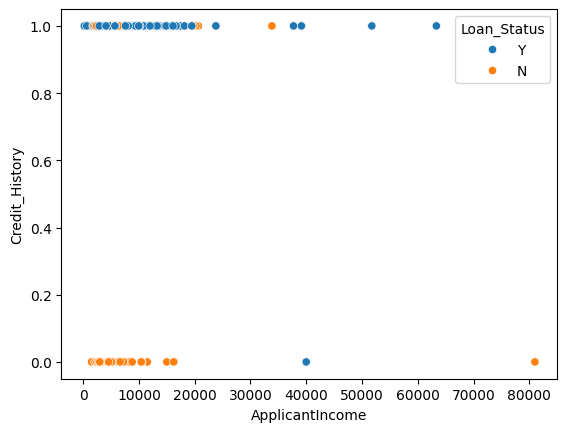

In [20]:
sns.scatterplot(x='ApplicantIncome',y='Credit_History',hue='Loan_Status',data=train)

<Axes: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

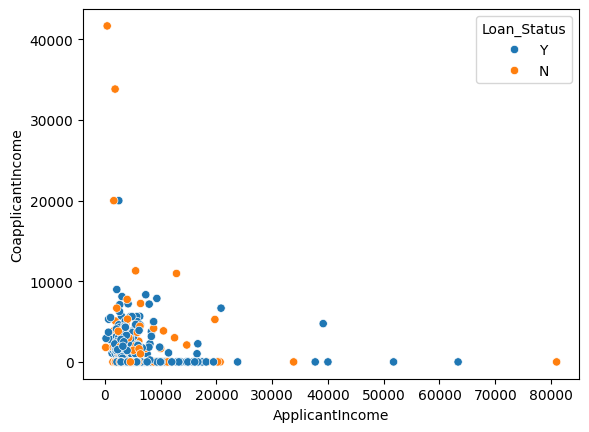

In [21]:
sns.scatterplot(x='ApplicantIncome',y='CoapplicantIncome',hue='Loan_Status',data=train)

<Axes: xlabel='LoanAmount', ylabel='Self_Employed'>

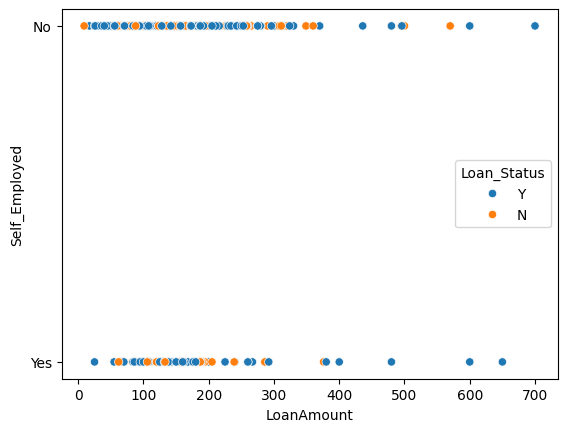

In [23]:
sns.scatterplot(x='LoanAmount',y='Self_Employed',hue='Loan_Status',data=train)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [25]:
train.groupby('Education')['Loan_Status'].value_counts(normalize=True)

Education     Loan_Status
Graduate      Y              0.708333
              N              0.291667
Not Graduate  Y              0.611940
              N              0.388060
Name: proportion, dtype: float64

In [27]:
train.groupby('Self_Employed')['Loan_Status'].value_counts()

Self_Employed  Loan_Status
No             Y              343
               N              157
Yes            Y               56
               N               26
Name: count, dtype: int64

In [28]:
train.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True)

Self_Employed  Loan_Status
No             Y              0.686000
               N              0.314000
Yes            Y              0.682927
               N              0.317073
Name: proportion, dtype: float64

In [29]:
train.groupby('Married')['Loan_Status'].value_counts(normalize=True)

Married  Loan_Status
No       Y              0.629108
         N              0.370892
Yes      Y              0.716080
         N              0.283920
Name: proportion, dtype: float64

In [36]:
train.groupby(['Married','Education'])['Loan_Status'].value_counts(normalize=True,sort=True)

Married  Education     Loan_Status
No       Graduate      Y              0.630952
                       N              0.369048
         Not Graduate  Y              0.622222
                       N              0.377778
Yes      Graduate      Y              0.747573
                       N              0.252427
         Not Graduate  Y              0.606742
                       N              0.393258
Name: proportion, dtype: float64

In [38]:
train.groupby(['Married','Education','Property_Area'])['Loan_Status'].value_counts(normalize=True,sort=True)

Married  Education     Property_Area  Loan_Status
No       Graduate      Rural          Y              0.608696
                                      N              0.391304
                       Semiurban      Y              0.666667
                                      N              0.333333
                       Urban          Y              0.610169
                                      N              0.389831
         Not Graduate  Rural          Y              0.588235
                                      N              0.411765
                       Semiurban      Y              0.823529
                                      N              0.176471
                       Urban          N              0.636364
                                      Y              0.363636
Yes      Graduate      Rural          Y              0.658824
                                      N              0.341176
                       Semiurban      Y              0.819672
                    

In [40]:
train.groupby(['Property_Area'])['Loan_Status'].value_counts(normalize=True,sort=True)

Property_Area  Loan_Status
Rural          Y              0.614525
               N              0.385475
Semiurban      Y              0.768240
               N              0.231760
Urban          Y              0.658416
               N              0.341584
Name: proportion, dtype: float64

In [41]:
train.groupby(['Dependents'])['Loan_Status'].value_counts(normalize=True,sort=True)

Dependents  Loan_Status
0           Y              0.689855
            N              0.310145
1           Y              0.647059
            N              0.352941
2           Y              0.752475
            N              0.247525
3+          Y              0.647059
            N              0.352941
Name: proportion, dtype: float64

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

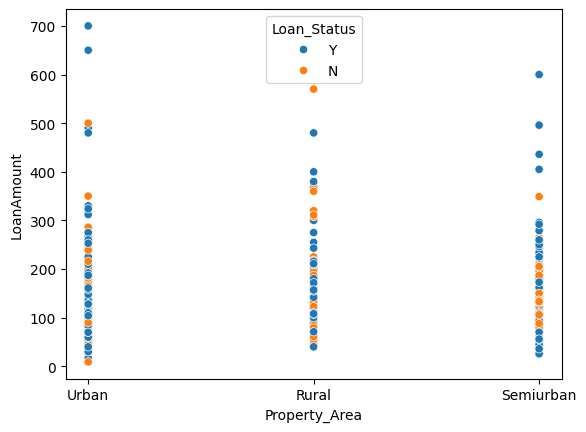

In [44]:
sns.scatterplot(x='Property_Area',y='LoanAmount',hue='Loan_Status',data=train)

<Axes: xlabel='Property_Area', ylabel='Loan_Status'>

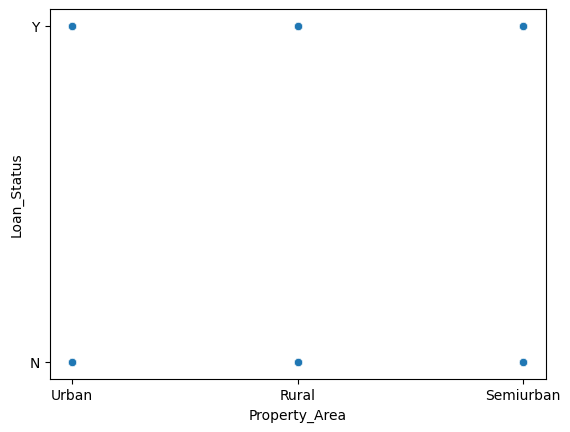

In [46]:
sns.scatterplot(x='Property_Area',y='Loan_Status',data=train)

In [50]:
grouped=train.groupby(['Property_Area'])['Loan_Status'].value_counts(normalize=True,sort=True).unstack()

<Axes: xlabel='Loan_Status', ylabel='Property_Area'>

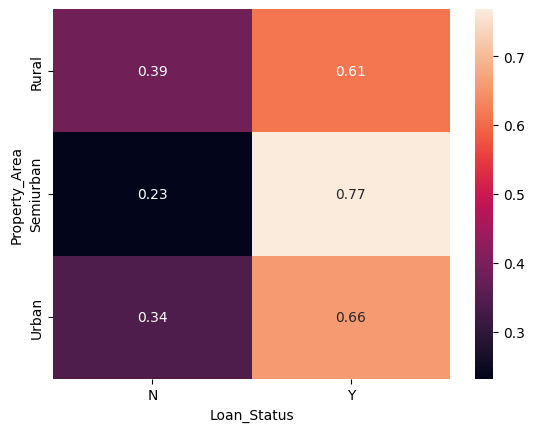

In [51]:
sns.heatmap(grouped,annot=True)

In [53]:
grouped=train.groupby(['Married','Education','Property_Area'])['Loan_Status'].value_counts(normalize=True,sort=True).unstack()

<Axes: xlabel='Loan_Status', ylabel='Married-Education-Property_Area'>

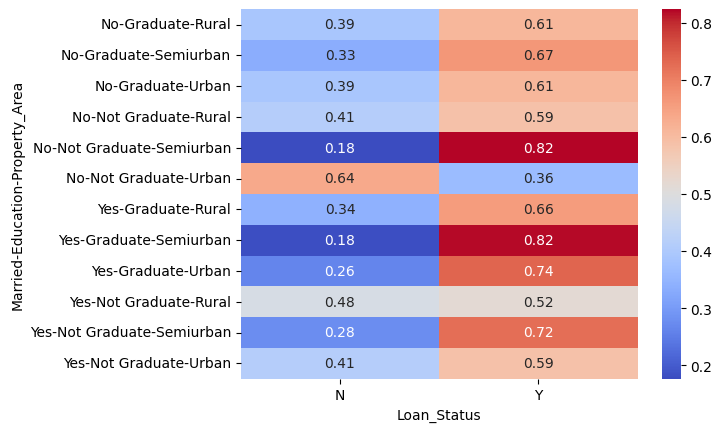

In [56]:
sns.heatmap(grouped,annot=True,cmap='coolwarm',cbar='True')

<Axes: xlabel='Married,Education,Property_Area'>

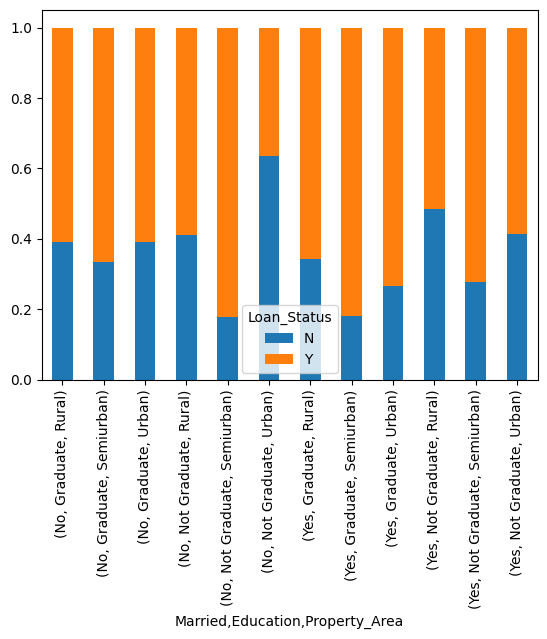

In [57]:
grouped.plot(kind='bar',stacked=True)

In [60]:
train.select_dtypes(include=np.number).corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [61]:
train['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

/var/folders/8b/_vkggsks1pvdn519cywyj0_40000gn/T/ipykernel_30095/624744439.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Loan_Status'].replace({'Y':1,'N':0},inplace=True)


In [62]:
train.select_dtypes(include=np.number).corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<Axes: >

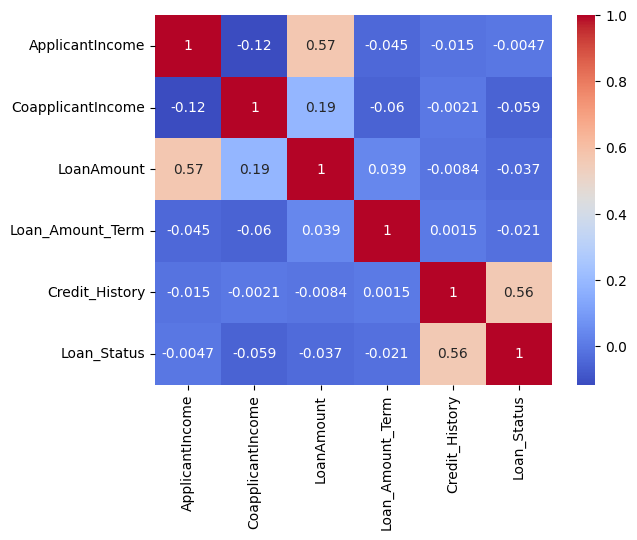

In [64]:
sns.heatmap(train.select_dtypes(include=np.number).corr(),annot=True,cmap='coolwarm')

<Axes: >

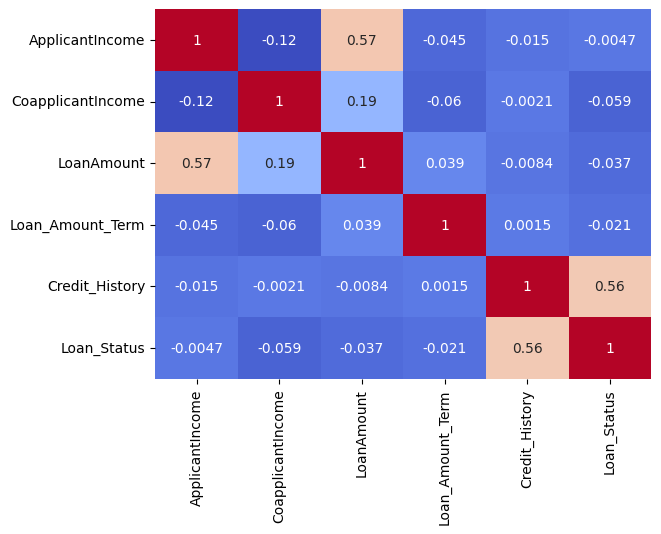

In [72]:
sns.heatmap(train.select_dtypes(include=np.number).corr(),annot=True,cmap='coolwarm',cbar=False)

In [81]:
#preprocessing

train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [85]:
train.select_dtypes(exclude=np.number)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001002,Male,No,0,Graduate,No,Urban
1,LP001003,Male,Yes,1,Graduate,No,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,Urban
4,LP001008,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural
610,LP002979,Male,Yes,3+,Graduate,No,Rural
611,LP002983,Male,Yes,1,Graduate,No,Urban
612,LP002984,Male,Yes,2,Graduate,No,Urban


In [87]:
train.select_dtypes(exclude=np.number).isna().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
dtype: int64

In [93]:
cat_impute = ['Gender','Married','Dependents','Self_Employed','Credit_History']

for col in cat_impute:
    train[col].fillna(train[col].mode()[0],inplace=True)

/var/folders/8b/_vkggsks1pvdn519cywyj0_40000gn/T/ipykernel_30095/2867654635.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode()[0],inplace=True)


In [94]:
train.select_dtypes(exclude=np.number).isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [96]:
train.select_dtypes(include=np.number)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,NaN,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1
610,4106,0.0,40.0,180.0,1.0,1
611,8072,240.0,253.0,360.0,1.0,1
612,7583,0.0,187.0,360.0,1.0,1


In [97]:
train.select_dtypes(include=np.number).isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Loan_Status           0
dtype: int64

In [100]:
num_impute = ['LoanAmount','Loan_Amount_Term']

for col in num_impute:
    train[col].fillna(train[col].median(),inplace=True)

/var/folders/8b/_vkggsks1pvdn519cywyj0_40000gn/T/ipykernel_30095/3037749503.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(),inplace=True)
/var/folders/8b/_vkggsks1pvdn519cywyj0_40000gn/T/ipykernel_30095/3037749503.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [101]:
train.select_dtypes(include=np.number).isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64

In [103]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [105]:
train['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [110]:
train['Dependents'].replace({'3+':3},inplace=True)

In [111]:
train['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [112]:
test.select_dtypes(exclude=np.number).isna().sum()

Loan_ID           0
Gender           11
Married           0
Dependents       10
Education         0
Self_Employed    23
Property_Area     0
dtype: int64

In [113]:
test.select_dtypes(include=np.number).isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
dtype: int64

In [116]:
print(train['Loan_Status'].count())
train['Loan_Status'].value_counts()

614


Loan_Status
1    422
0    192
Name: count, dtype: int64

In [117]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [118]:
test['Dependents'].value_counts()

Dependents
0     200
2      59
1      58
3+     40
Name: count, dtype: int64

## Pipeline to impute Train Data

In [120]:
train = pd.read_csv('train.csv')

In [121]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [124]:
train['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

/var/folders/8b/_vkggsks1pvdn519cywyj0_40000gn/T/ipykernel_30095/624744439.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Loan_Status'].replace({'Y':1,'N':0},inplace=True)


In [125]:
train['Loan_ID'].nunique()

614

In [126]:
X = train.drop(columns=['Loan_ID','Loan_Status'])
y= train['Loan_Status']

In [127]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [129]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=2)

In [133]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [134]:
categorical_features=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History', 'Property_Area']
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

In [146]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [142]:
categorical_transformer= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('Onehot',OneHotEncoder())
])

In [143]:
numerical_transformer= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('Onehot',StandardScaler())
])

In [145]:
preprocessor = ColumnTransformer(transformers=[
    ('cat_transfrom',categorical_transformer,categorical_features),
    ('num_transfrom',numerical_transformer,numerical_features)
])

In [149]:
model_preprocess_pipeline =Pipeline(steps=[
    ('preprocess',preprocessor),
    ('logistic_model',LogisticRegression())
])

In [150]:
model_preprocess_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_transfrom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Onehot',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area']),
                                                 ('num_transfrom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Onehot',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term'])])),
                ('logistic_model', LogisticRegression())])

In [151]:
model_preprocess_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_transfrom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Onehot',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area']),
                                                 ('num_transfrom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Onehot',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term'])])),
                ('logistic_model', LogisticRegression())])

In [160]:
train_pred = model_preprocess_pipeline.predict(X_train)

In [153]:
model_preprocess_pipeline.predict_proba(X_train)

array([[0.1569643 , 0.8430357 ],
       [0.2528108 , 0.7471892 ],
       [0.11934059, 0.88065941],
       [0.1989611 , 0.8010389 ],
       [0.15189364, 0.84810636],
       [0.12332249, 0.87667751],
       [0.23573615, 0.76426385],
       [0.31100316, 0.68899684],
       [0.89887401, 0.10112599],
       [0.8888333 , 0.1111667 ],
       [0.24216487, 0.75783513],
       [0.89260482, 0.10739518],
       [0.86050105, 0.13949895],
       [0.13301521, 0.86698479],
       [0.13567157, 0.86432843],
       [0.31052258, 0.68947742],
       [0.20543061, 0.79456939],
       [0.27971574, 0.72028426],
       [0.31130253, 0.68869747],
       [0.14982497, 0.85017503],
       [0.10053993, 0.89946007],
       [0.09246832, 0.90753168],
       [0.91076193, 0.08923807],
       [0.09382749, 0.90617251],
       [0.2357717 , 0.7642283 ],
       [0.27385127, 0.72614873],
       [0.15521865, 0.84478135],
       [0.24209873, 0.75790127],
       [0.26950732, 0.73049268],
       [0.18639066, 0.81360934],
       [0.

In [154]:
model_preprocess_pipeline.predict_proba(X_train)[:,1]

array([0.8430357 , 0.7471892 , 0.88065941, 0.8010389 , 0.84810636,
       0.87667751, 0.76426385, 0.68899684, 0.10112599, 0.1111667 ,
       0.75783513, 0.10739518, 0.13949895, 0.86698479, 0.86432843,
       0.68947742, 0.79456939, 0.72028426, 0.68869747, 0.85017503,
       0.89946007, 0.90753168, 0.08923807, 0.90617251, 0.7642283 ,
       0.72614873, 0.84478135, 0.75790127, 0.73049268, 0.81360934,
       0.78639751, 0.79776257, 0.80418548, 0.89343872, 0.54562776,
       0.77876351, 0.68627265, 0.88817719, 0.91448357, 0.87241799,
       0.63184483, 0.89176789, 0.90523648, 0.7900647 , 0.11530929,
       0.90148937, 0.07218397, 0.8919536 , 0.82599462, 0.87540912,
       0.74372525, 0.83563121, 0.03415321, 0.69943152, 0.13972264,
       0.81945423, 0.89888162, 0.80427625, 0.85777867, 0.78376311,
       0.83779943, 0.8552009 , 0.70213919, 0.10051615, 0.60176536,
       0.08520595, 0.83507912, 0.6715142 , 0.86826289, 0.07779955,
       0.82927404, 0.81111726, 0.85598153, 0.81508491, 0.75274

In [157]:
a=np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [158]:
np.where(a>5,1,0)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [155]:
np.where(model_preprocess_pipeline.predict_proba(X_train)[:,1]>0.6,1,0)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,

In [161]:
test_pred = model_preprocess_pipeline.predict(X_val)

### Logistic regression Metrics

In [165]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [163]:
confusion_matrix(y_train,train_pred)

array([[ 61,  73],
       [  6, 289]])

In [164]:
confusion_matrix(y_val,test_pred)

array([[ 23,  35],
       [  3, 124]])

In [166]:
accuracy_score(y_train,train_pred)

0.8158508158508159

In [167]:
accuracy_score(y_val,test_pred)

0.7945945945945946

In [170]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.91      0.46      0.61       134
           1       0.80      0.98      0.88       295

    accuracy                           0.82       429
   macro avg       0.85      0.72      0.74       429
weighted avg       0.83      0.82      0.79       429



In [169]:
print(classification_report(y_val,test_pred))

              precision    recall  f1-score   support

           0       0.88      0.40      0.55        58
           1       0.78      0.98      0.87       127

    accuracy                           0.79       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.81      0.79      0.77       185



In [171]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [172]:
test = test.drop(columns=['Loan_ID'])

In [173]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [174]:
hackathon_pred= model_preprocess_pipeline.predict(test)

In [175]:
hackathon_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [177]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [178]:
sample['Loan_Status']=hackathon_pred

In [179]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [180]:
sample['Loan_Status'].replace({1:'Y',0:'N'},inplace=True)

/var/folders/8b/_vkggsks1pvdn519cywyj0_40000gn/T/ipykernel_30095/3582650464.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample['Loan_Status'].replace({1:'Y',0:'N'},inplace=True)


In [183]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [184]:
sample.to_csv('pred_output1.csv',index=False)

### Prediction Output 1 
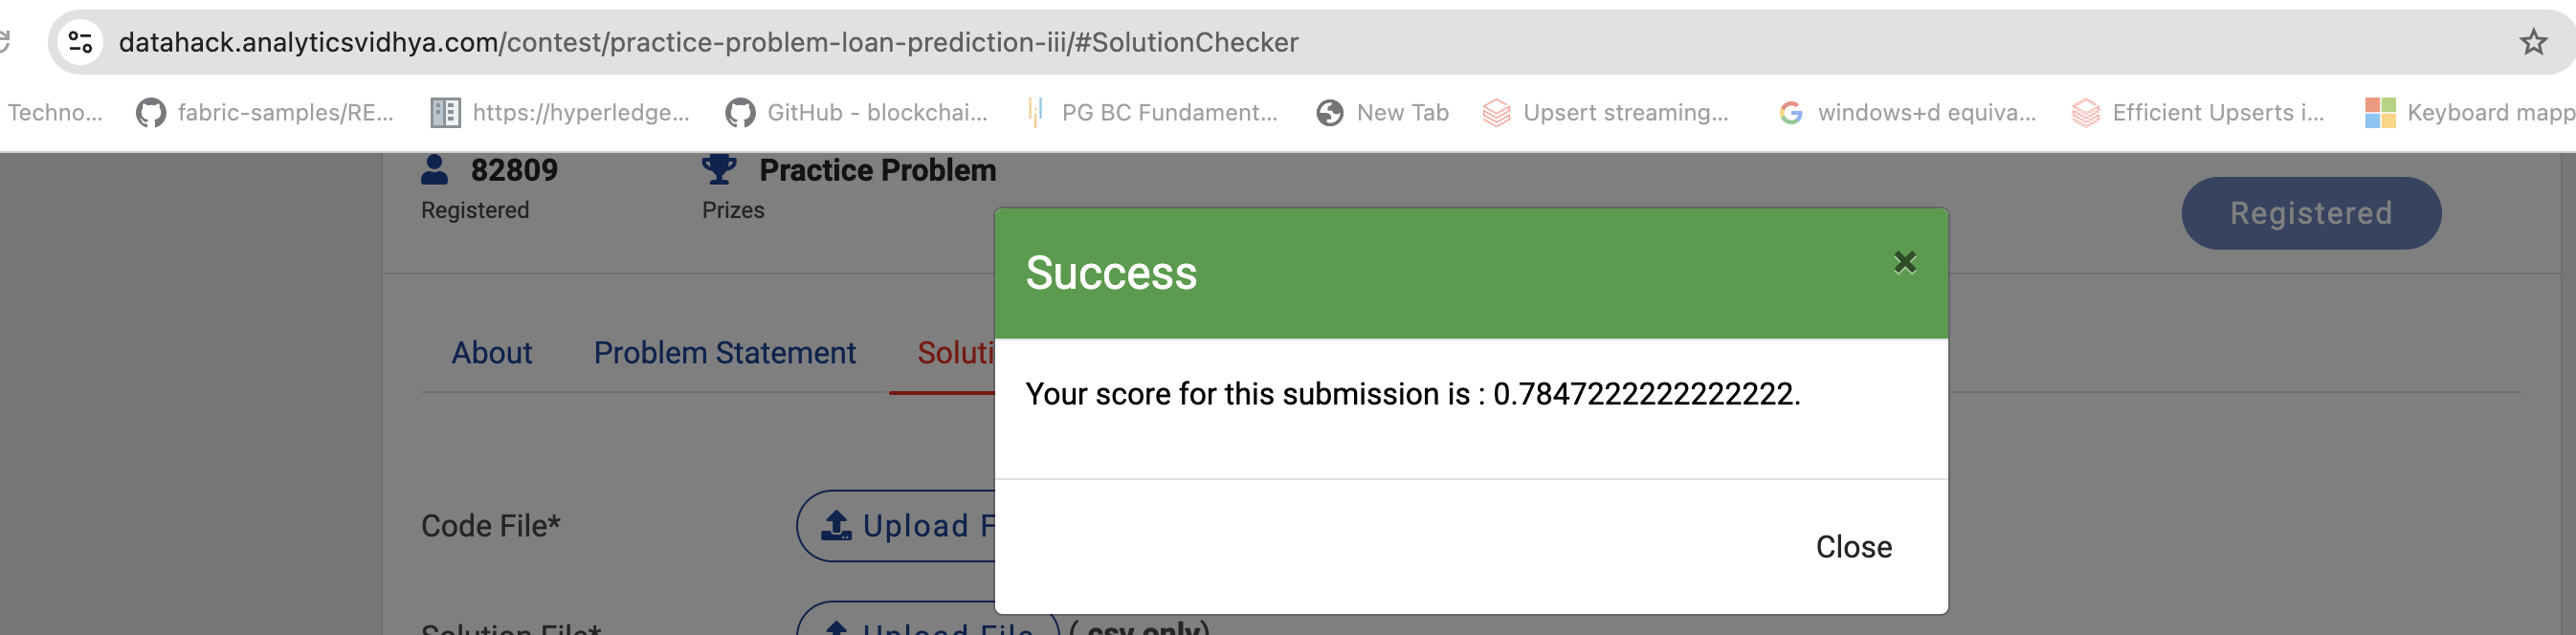

In [ ]:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB